In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
# Settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [3]:
# Load the dataset
df = pd.read_csv("data.csv")
df.head()

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Ariel,movie,"Comedy, Crime, Drama",1988.0,tt0094675,7.4,9231.0,NaN
1,Shadows in Paradise,movie,"Comedy, Drama, Music",1986.0,tt0092149,7.4,8064.0,NaN
2,Forrest Gump,movie,"Drama, Romance",1994.0,tt0109830,8.8,2389575.0,NaN
3,American Beauty,movie,Drama,1999.0,tt0169547,8.3,1252047.0,NaN
4,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,tt0119116,7.6,528700.0,NaN


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21905 entries, 0 to 21904
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               21174 non-null  object 
 1   type                21905 non-null  object 
 2   genres              21535 non-null  object 
 3   releaseYear         21866 non-null  float64
 4   imdbId              20267 non-null  object 
 5   imdbAverageRating   20090 non-null  float64
 6   imdbNumVotes        20090 non-null  float64
 7   availableCountries  154 non-null    object 
dtypes: float64(3), object(5)
memory usage: 1.3+ MB


In [5]:
# Drop rows where releaseYear or ratings are missing
df = df.dropna(subset=['releaseYear'])
df['releaseYear'] = df['releaseYear'].astype(int)

df = df.dropna(subset=['imdbAverageRating', 'imdbNumVotes'])
df['genres'] = df['genres'].fillna('Unknown')


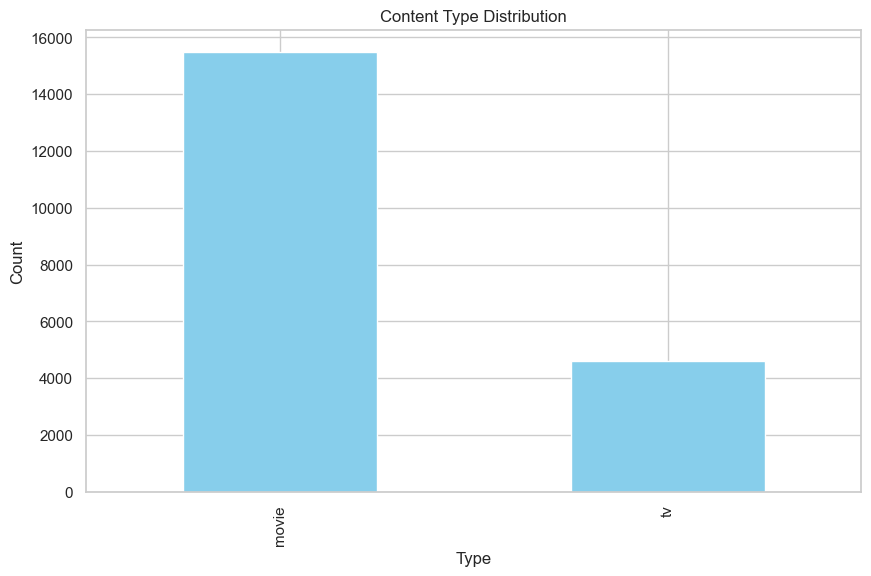

In [6]:
df['type'].value_counts().plot(kind='bar', title='Content Type Distribution', color='skyblue')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


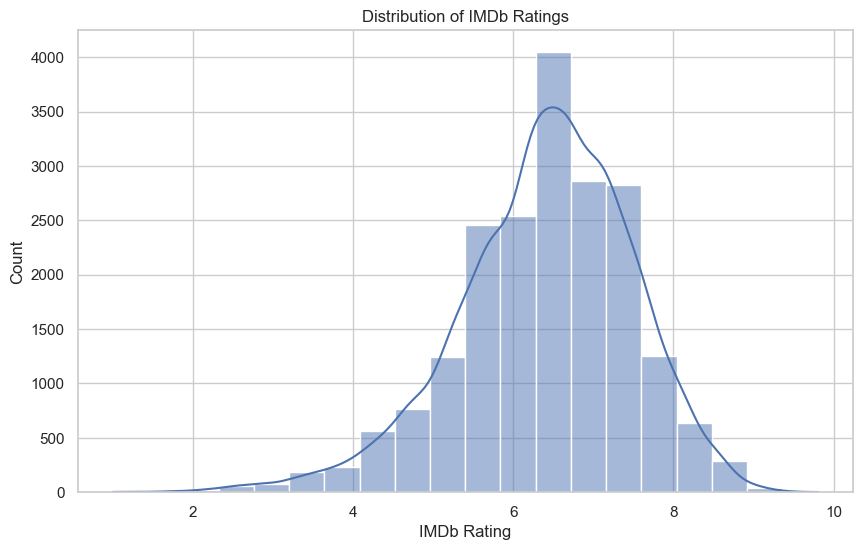

In [7]:
sns.histplot(df['imdbAverageRating'], bins=20, kde=True)
plt.title("Distribution of IMDb Ratings")
plt.xlabel("IMDb Rating")
plt.ylabel("Count")
plt.show()


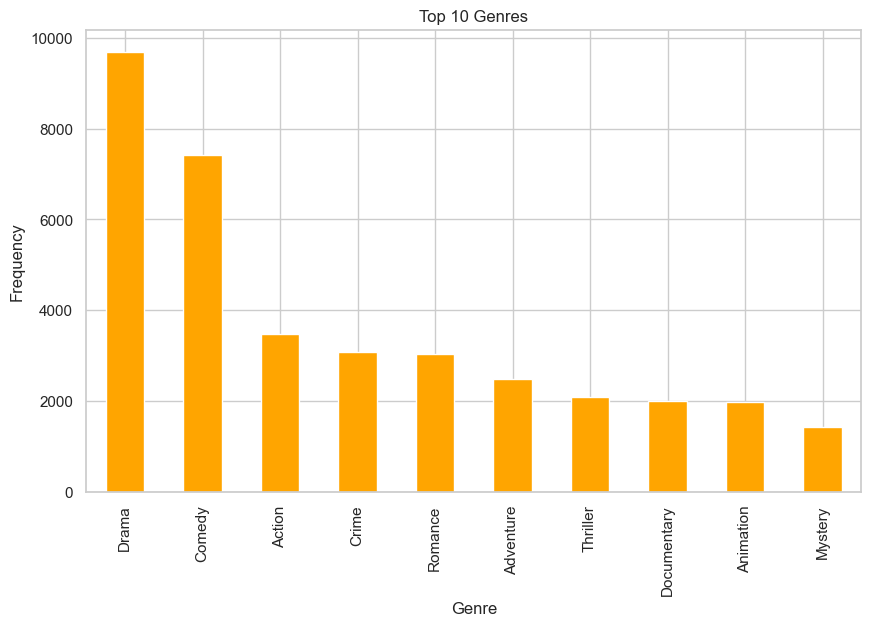

In [8]:
genre_counts = df['genres'].str.split(', ').explode().value_counts().head(10)
genre_counts.plot(kind='bar', title='Top 10 Genres', color='orange')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.show()


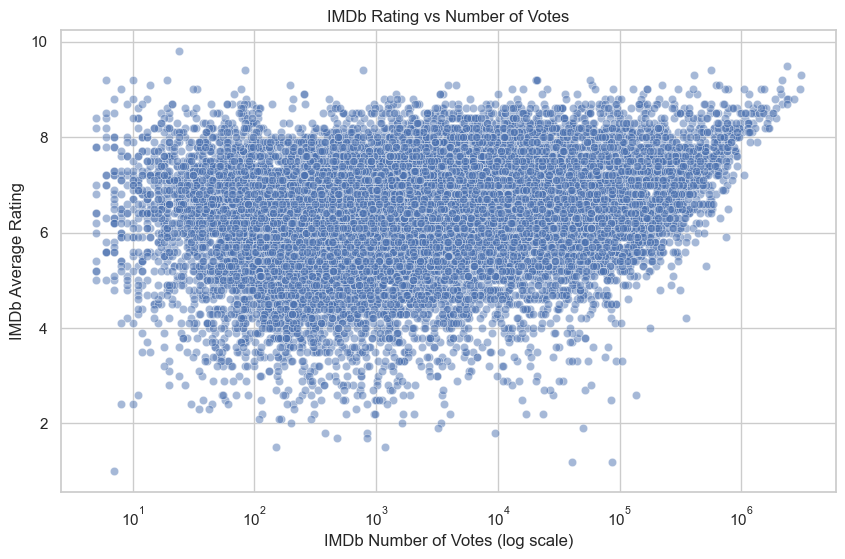

In [9]:
sns.scatterplot(data=df, x='imdbNumVotes', y='imdbAverageRating', alpha=0.5)
plt.xscale('log')
plt.title("IMDb Rating vs Number of Votes")
plt.xlabel("IMDb Number of Votes (log scale)")
plt.ylabel("IMDb Average Rating")
plt.show()


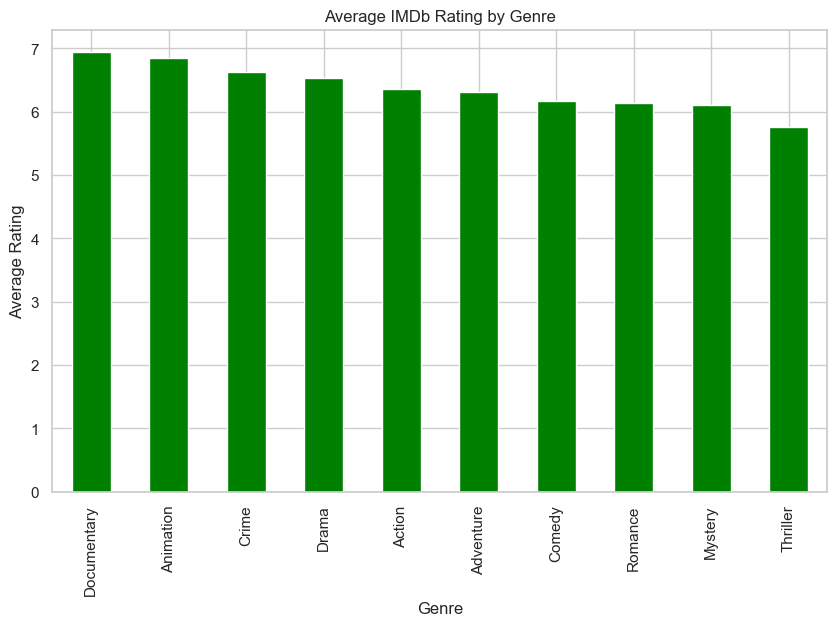

In [10]:
top_genres = genre_counts.index.tolist()
df['primary_genre'] = df['genres'].str.split(',').str[0]
genre_ratings = df[df['primary_genre'].isin(top_genres)].groupby('primary_genre')['imdbAverageRating'].mean().sort_values(ascending=False)

genre_ratings.plot(kind='bar', title='Average IMDb Rating by Genre', color='green')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.show()


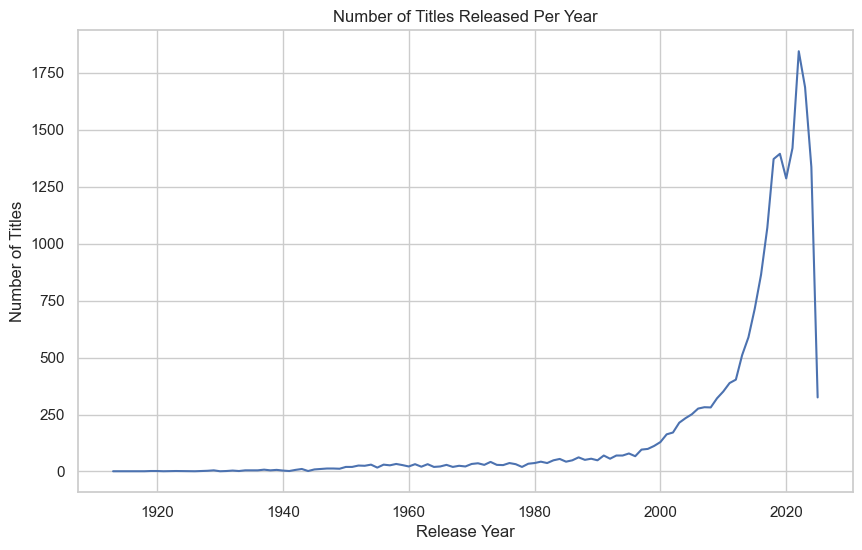

In [11]:
release_trend = df['releaseYear'].value_counts().sort_index()
sns.lineplot(x=release_trend.index, y=release_trend.values)
plt.title("Number of Titles Released Per Year")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.show()
